In [1]:
import numpy as np
import h5py
from scipy.ndimage import gaussian_filter1d as gauss_conv
from numba.decorators import jit
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

%matplotlib inline

In [2]:
import os
print(os.environ['PYTHONPATH'])

/home/liac/python-lib/chandra_psf:/home/liac/dev/cloudacademyMap:/home/liac/dev/cloudacademyMap/gas_opac


In [3]:
cd ~/dev/cloudacademyMap/gas_opac/

/home/liac/dev/cloudacademyMap/gas_opac


In [5]:
import opacity_demo as demo

Now reading in cross sections
H2O done
CH4 done
NH3 done
HCN done
CO done
CO2 done


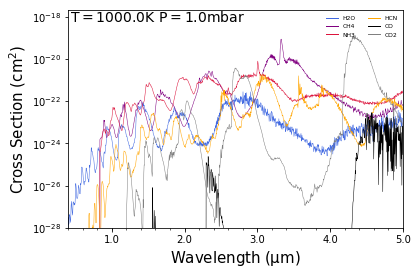

In [8]:
# Specify which molecules you want to extract from the database (full list available in the readme)
chemical_species = np.array(['H2O', 'CH4', 'NH3', 'HCN', 'CO', 'CO2'])

# At what temperature and pressure do you desire the cross sections?
P = 1.0e-3    # Pressure (bar)
T = 1000.0    # Temperature (K)        

# Specify wavelength grid to extract cross section onto
wl_min = 0.4  # Minimum wavelength of grid (micron)
wl_max = 5.0  # Maximum wavelength of grid (micron)
N_wl = 1000   # Number of wavelength points

wl = np.linspace(wl_min, wl_max, N_wl)  # Uniform grid used here for demonstration purposes   

# Either sample the nearest wavelength points from the high resolution (R~10^6) cross section database or use an averaging prescription 
opacity_treatment = 'Log-avg'           # Options: Opacity-sample / Log-avg
#opacity_treatment = 'Opacity-sample'   # Opacity sampling is faster, but for low-resolution wavelength grids log averaging is recommended
  
# Extract desired cross sections from the database
cross_sections = demo.Extract_opacity(chemical_species, P, T, wl, opacity_treatment)   # Format: np array(N_species, N_wl) / Units: (m^2 / species)

# Example: seperate H2O cross section, and print to terminal
H2O_cross_section = cross_sections[np.where(chemical_species=='H2O')[0][0],:]    # Format: np array(N_wl) / Units: (m^2 / molecule)
#print (H2O_cross_section)

# Plot cross sections
demo.plot_opacity(chemical_species, cross_sections, P, T, wl)